Importar librerías

In [ ]:
import pandas as pd

Importar base de datos a usar

In [ ]:
df = pd.read_csv('/content/datos_vehiculos.csv')
df.to_csv('/content/datos_vehiculos.csv', index=False)
#vamos a analizar el presio

Mostrar encabezados

In [ ]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,?,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,?,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,?,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,?,61.4,1.0


Análisis estadístico básico de los datos

In [ ]:
df.describe()

,year,price,mileage,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,10.125696,0.432367
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,201.800000,5.000000


Información de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  object 
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ MB


Identificar valores faltantes


Convertir ? en NaN

In [ ]:
import numpy as np

# reemplazar "?" a NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,NaN,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,NaN,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,NaN,61.4,1.0


Valores faltantes en cada columna

In [ ]:
df.isnull().sum()

model            0
year             0
price            0
transmission     0
mileage          0
fuelType         0
tax             54
mpg              0
engineSize       0
dtype: int64

Manipulacion de valores faltantes: Reemplazando por su promedio, como en tax hay 54 datos faltantes, estos los reemplazaremos por el promedio de los demas datos de esa columna

Calcular el valor promedio de la columna "tax"

In [ ]:
tax_prom = df["tax"].astype("float").mean(axis=0)
print("El promedio de la columna tax es:", tax_prom)

El promedio de la columna tax es: 113.41793211255025


Reemplazar "NaN" con el valor promedio en la columna "tax"

In [ ]:
df["tax"].replace(np.nan, tax_prom, inplace=True)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,113.417932,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,113.417932,61.4,1.0


Correfir el formato de los datos

In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax              object
mpg             float64
engineSize      float64
dtype: object

La columna tax se encuentra en formato object, por lo que no se encuentra en un formto apto para trabajarlos, ya que es una variable numerica y su formato debe ser de tipo int o float

In [ ]:
df[["tax"]] = df[["tax"]].astype("float")
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

Estandarizar datos de entrada

Transformar **mpg** a **Km/L**:

En el conjunto de datos el consumo de combustible de la columna `mpg` están dados en la únidad de millas por galón o **mpg**. Si se está desarrollando una aplicación en un país que trabaja el consumo de combustible con el estándar de kilómetros por litros **Km/L**, estos valores se deben cambiar.

Por este motivo se necesita aplicar una **transformación de datos** para convertir de **mpg** a **Km/L**.

La fórmula de unidad de conversión es:

1 mpg(US) = 0.425144 Km/L

In [ ]:
df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0


In [ ]:
df['km/L'] = df["mpg"]*0.425144
df['km'] = df["mileage"]*1.60934
#df.drop("mpg a km/L", axis=1, inplace=True)
df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSizeNorm,km/LNorm,kmNorm,gastos-en-tax,km/L,km
0,Fiesta,2017,12000,Automatic,15944,Petrol,113,57.7,1.0,0.20,0.285927,0.089753,Bajo,24.530809,25659.31696
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0.20,0.285927,0.051130,Bajo,24.530809,14617.63522
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0.20,0.285927,0.070118,Bajo,24.530809,20045.93904
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0.30,0.199703,0.058882,Bajo,17.133303,16833.69640
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0.20,0.241328,0.008343,Bajo,20.704513,2385.04188
5,Fiesta,2015,10500,Manual,35432,Petrol,113,47.9,1.6,0.32,0.237364,0.199455,Bajo,20.364398,57022.13488
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0,0.20,0.249752,0.011422,Bajo,21.427258,3265.35086


Normalizar datos de entrada

**Objetivo**: Normalizar las variables de la columna engineSize tal que sus rangos de valores estén entre 0 y 1

**Estrategia**: reemplazar el valor original por (valor original)/(valor máximo)

In [ ]:
df['km/LNorm'] = df['km/L']/df['km/L'].max()
df['kmNorm'] = df['km']/df['km'].max()
df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSizeNorm,km/LNorm,kmNorm,gastos-en-tax,km/L,km
0,Fiesta,2017,12000,Automatic,15944,Petrol,113,57.7,1.0,0.20,0.285927,0.089753,Bajo,24.530809,25659.31696
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0.20,0.285927,0.051130,Bajo,24.530809,14617.63522
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0.20,0.285927,0.070118,Bajo,24.530809,20045.93904
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0.30,0.199703,0.058882,Bajo,17.133303,16833.69640
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0.20,0.241328,0.008343,Bajo,20.704513,2385.04188
5,Fiesta,2015,10500,Manual,35432,Petrol,113,47.9,1.6,0.32,0.237364,0.199455,Bajo,20.364398,57022.13488
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0,0.20,0.249752,0.011422,Bajo,21.427258,3265.35086


Agrupar datos de entrada

In [ ]:
df["km/L"]=df["km/L"].astype(int, copy=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSizeNorm,km/LNorm,kmNorm,gastos-en-tax,km/L,km
0,Fiesta,2017,12000,Automatic,15944,Petrol,113,57.7,1.0,0.2,0.285927,0.089753,Bajo,24,25659.31696
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0.2,0.285927,0.051130,Bajo,24,14617.63522
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0.2,0.285927,0.070118,Bajo,24,20045.93904
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0.3,0.199703,0.058882,Bajo,17,16833.69640
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0.2,0.241328,0.008343,Bajo,20,2385.04188


Graficar un histograma de `tax` para ver la forma de la distribución de los valores en la columna `tax`.

Text(0.5, 1.0, 'Contenedores km/L')

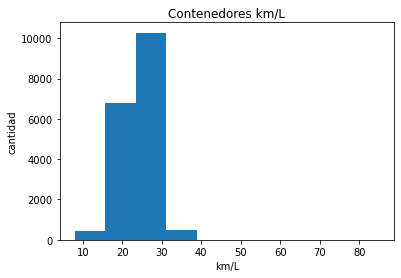

In [ ]:
%matplotlib inline
import matplotlib as plt
#from matplotlib import pyplot

plt.pyplot.hist(df["km/L"])

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")

Generar los contenedores usando la funcion de `numpy` (**numpy** `linspace(valor_inicial, valor_final, numero_divisiones)`.)

In [ ]:
contenedores = np.linspace(min(df["km/L"]), max(df["km/L"]), 4)
contenedores

array([ 8.        , 33.66666667, 59.33333333, 85.        ])

Se crea una lsta con el grupo de las variables, las cuales se dividiran en bajo, alto y mediano

In [ ]:
gasto =['Bajo', 'Mediano', 'Alto']

Se utiliza la funcion cut para definir los valores pertenecientes a cada grupo 

In [ ]:
df['gastos-en-km/L'] = pd.cut(df['km/L'], contenedores, labels=gasto, include_lowest=True )
df[['km/L','gastos-en-km/L']].tail(10)

,km/L,gastos-en-km/L
17956,20,Bajo
17957,22,Bajo
17958,20,Bajo
17959,29,Bajo
17960,23,Bajo
17961,20,Bajo
17962,24,Bajo
17963,28,Bajo
17964,24,Bajo
17965,24,Bajo


Para ver el numero de autos que hay en cada grupo de gastos en km/L, se usa el metodo `.values_counts()`

In [ ]:
df['gastos-en-km/L'].value_counts() 

Bajo       17770
Mediano      191
Alto           5
Name: gastos-en-km/L, dtype: int64

Grafico de cada distribucion 

Text(0.5, 1.0, 'Contenedores km/L')

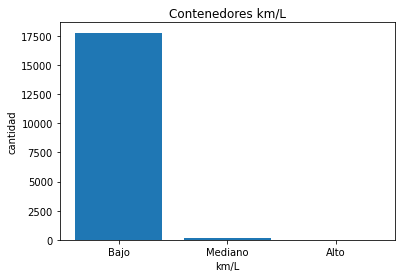

In [ ]:
plt.pyplot.bar(gasto, df["gastos-en-km/L"].value_counts())

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSizeNorm,km/LNorm,kmNorm,gastos-en-tax,km/L,km,gastos-en-km/L
0,Fiesta,2017,12000,Automatic,15944,Petrol,113,57.7,1.0,0.2,0.285927,0.089753,NaN,24,25659.31696,Bajo
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0.2,0.285927,0.051130,NaN,24,14617.63522,Bajo
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0.2,0.285927,0.070118,NaN,24,20045.93904,Bajo
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0.3,0.199703,0.058882,NaN,17,16833.69640,Bajo
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0.2,0.241328,0.008343,NaN,20,2385.04188,Bajo


Visualizacion de la distribucion de cada contenedor

Text(0.5, 1.0, 'Contenedores km/L')

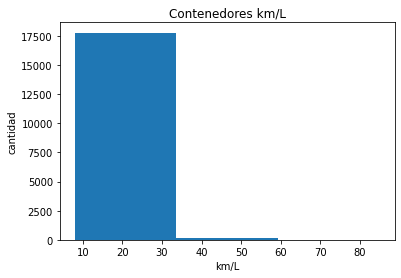

In [ ]:
plt.pyplot.hist(df["km/L"], bins=3)

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")



```
# Esto tiene formato de código
```

PUNTO 8!!!!!!!!!!!!!!!!!!!!!!!!! waaaaaaaaaaaa

In [ ]:
df.columns

In [ ]:
variable_dummy_1 = pd.get_dummies(df["transmission"])
variable_dummy_1.head()

In [ ]:
variable_dummy_1.rename(columns={'Automatic':'Transmision Automatica', 'Manual':'Transmision Manual', 'Semi-Auto':'Transmision Semi-Automatica'}, inplace=True)
variable_dummy_1.head()

In [ ]:
# combinar los dataframes "df" y "variable_dummy_1" 
df = pd.concat([df, variable_dummy_1], axis=1)

# Elimina la columna original "transmission" del dataframe "df"
df.drop("transmission", axis = 1, inplace=True)

In [ ]:
df.head()
